To approach this problem I will try both the Logistic Regression and Multiclass classification and compare their performances. For the multiclass classification, we shall be using one-vs-all approach. For the second question, for the binary classification problem I am again using a multiclass classifier but since there will be only two classes only one model will be trained. 

We have used only the red wine data in the following implementations but it can be easily substituted for white wine data also. 

In [1]:
# Import useful libraries for reading data, preprocessing and classification
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

/home/sp/anaconda3/envs/myEnvPy3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read data
redWineData = pd.read_csv("winequality-red.csv", sep=';')
whiteWineData = pd.read_csv("winequality-white.csv", sep=';')

In [3]:
redWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Show the different quality labels
redWineData['quality'].unique()

array([5, 6, 7, 4, 8, 3])

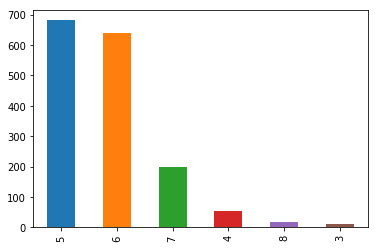

In [5]:
# Show the count of each quality 
redWineData['quality'].value_counts().plot(kind='bar')

In [6]:
# Separate input features
X = redWineData.iloc[:,:11]

In [7]:
# To see the mean, standard deviation and range of each feature column
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
# Separate output features
Y = redWineData['quality']

## Pre-processing

We will perform some basic data preprocessing to have all the features within the same range, so the model trains faster. We have avoided PCA in these steps as when trying them we found that the number of components needed to retain 99% of variance was still 9 so it didn't make much sense to reduce it from 11 features to 9 features. 

In [9]:
# Split the dataset into training set and testing set
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.35)

In [10]:
# Scale the input features to a range between 0 and 1
minMaxScaler = preprocessing.MinMaxScaler()
xTrain = minMaxScaler.fit_transform(xTrain)

As there was no direction given for % of test set, we have decided between the standard 30-40% split for test data size.

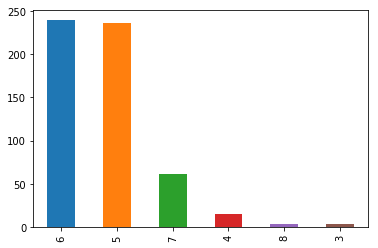

In [11]:
yTest.value_counts().plot(kind='bar') 

### 1. Logistic Regression

In [12]:
# Instantiate the model
logRegression = LogisticRegression()

# Train the model
logRegression.fit(xTrain, yTrain)

# Predict on test data
logRegressionPredict = logRegression.predict(xTest)

In [13]:
# Print confusion matrix and accuracy score
logRegressionConfMatrix = confusion_matrix(yTest, logRegressionPredict) # Create Confusion Matrix
logRessionAccScore = accuracy_score(yTest, logRegressionPredict) # Accuracy Score

print("Confusion Matrix for Logistic Regression:\n", logRegressionConfMatrix)
print("Logistic Regression Accuracy Score: ", logRessionAccScore * 100)

Confusion Matrix for Logistic Regression:
 [[  0   0   1   0   3   0]
 [  0   0   9   0   6   0]
 [  0   0 197   0  39   0]
 [  0   0 174   0  65   0]
 [  0   0  36   0  26   0]
 [  0   0   2   0   2   0]]
Logistic Regression Accuracy Score:  39.82142857142857


### 2. Multi-class classification - SVM

In [14]:
linSvcClf = sk.svm.LinearSVC()

# Train classifier
print(linSvcClf.fit(xTrain, yTrain))

# Predict on test data
linSvcClfPredict = linSvcClf.predict(xTest)

# Print Confusion matrix and Accuracy score
linSvcClfConfMatrix = confusion_matrix(yTest, linSvcClfPredict) # Create Confusion Matrix
linSvcClfAccScore = accuracy_score(yTest, linSvcClfPredict) # Accuracy Score

print("Confusion Matrix for Linear SVC:\n", linSvcClfConfMatrix)
print("Linear SVC Accuracy Score: ", linSvcClfAccScore * 100)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix for Linear SVC:
 [[  0   0   1   0   3   0]
 [  0   0   9   0   6   0]
 [  0   0 210   0  26   0]
 [  0   0 191   0  48   0]
 [  0   0  42   0  20   0]
 [  0   0   2   0   2   0]]
Linear SVC Accuracy Score:  41.07142857142857


As seen from above accuracy scores, we can see that multiclass classifier SVM has slightly better performance than Logistic Regression. Although, from the confusion matrix we can see that wine of quality: 3, 4, 7 and 8 have very low scores probably due to low number of samples.

### 3. Binary Classifier

In [15]:
# Create a new target column with 7 as threshold
YBinarySeven = (Y >= 7).astype(int)

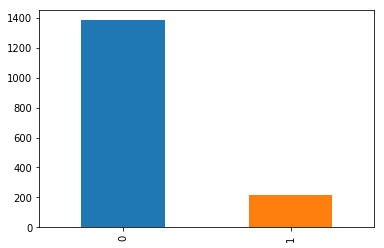

In [16]:
YBinarySeven.value_counts().plot(kind='bar')

In [17]:
# Split the dataset into training set and testing set
xTrainBinary7, xTestBinary7, yTrainBinary7, yTestBinary7 = train_test_split(X, YBinarySeven, test_size=0.35)

In [18]:
xTrainBinary7 = minMaxScaler.fit_transform(xTrainBinary7)

In [19]:
# Instantiate Linear SVC classifier
linearClassifierBinary7 = sk.svm.LinearSVC()

# Train the model
print(linearClassifierBinary7.fit(xTrainBinary7, yTrainBinary7))

# Predict on test data
linearClassifierBinary7_predict = linearClassifierBinary7.predict(xTestBinary7)

# Print Confusion matrix and Accuracy score
linearClassifierBinary7_conf_matrix = confusion_matrix(yTestBinary7, linearClassifierBinary7_predict) # Create Confusion Matrix
linearClassifierBinary7_acc_score = accuracy_score(yTestBinary7, linearClassifierBinary7_predict) # Accuracy Score

print("Confusion Matrix: \n", linearClassifierBinary7_conf_matrix)
print("Accuracy Score: ", linearClassifierBinary7_acc_score*100)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix: 
 [[403  83]
 [ 41  33]]
Accuracy Score:  77.85714285714286


### 3.b Binary Classifier -2 

In [20]:
# Create a new target column with 7 as threshold
YBinaryEight = (Y >= 8).astype(int)

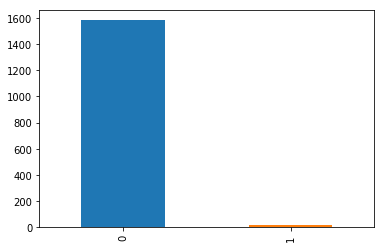

In [21]:
YBinaryEight.value_counts().plot(kind='bar')

In [22]:
# Split the dataset into training set and testing set
xTrainBinary8, xTestBinary8, yTrainBinary8, yTestBinary8 = train_test_split(X, YBinaryEight, test_size=0.35)

In [23]:
xTrainBinary8 = minMaxScaler.fit_transform(xTrainBinary8)

In [24]:
# Create instance of Linear SVC
linearClassifierBinary8 = sk.svm.LinearSVC()

# Fit the training data to Linear SVC
print(linearClassifierBinary8.fit(xTrainBinary8, yTrainBinary8))

# Predict on test data
linearClassifierBinary8_predict = linearClassifierBinary8.predict(xTestBinary8)

# Print Confusion matrix and Accuracy score
linearClassifierBinary8_conf_matrix = confusion_matrix(yTestBinary8, linearClassifierBinary8_predict) # Create Confusion Matrix
linearClassifierBinary8_acc_score = accuracy_score(yTestBinary8, linearClassifierBinary8_predict) # Accuracy Score

print("Confusion Matrix: \n", linearClassifierBinary8_conf_matrix)
print("Accuracy score:", linearClassifierBinary8_acc_score*100)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Confusion Matrix: 
 [[552   0]
 [  8   0]]
Accuracy score: 98.57142857142858


As seen from the above accuracy scores, we can see that the binary classifiers perform much better than the earlier models with multiple labels. 

## Use a Neural Network for Multi-class classification

In the following steps we will train a deep neural network with 2 hidden layers. As this model is built from scratch we will have to experiment with different hyperparameters. We are training this model for multi-class classification for the six classes of wine. 

In [25]:
# Import useful libraries
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Define model
def dense(input, name, in_size, out_size, activation="relu"):

    with tf.variable_scope(name, reuse=False):
        w = tf.get_variable("w", shape=[in_size, out_size],
                            initializer=tf.random_normal_initializer(mean=0, stddev=0.1))
        b = tf.get_variable("b", shape=[out_size], initializer=tf.constant_initializer(0.0))

        l = tf.add(tf.matmul(input, w), b)

        if activation == "relu":
            l = tf.nn.relu(l)
        elif activation == "sigmoid":
            l = tf.nn.sigmoid(l)
        elif activation == "tanh":
            l = tf.nn.tanh(l)
        else:
            l = l
        print(l)
    return l

def scope(y, y_, learning_rate=0.1):

    #Learning rate
    learning_rate = tf.Variable(learning_rate,  trainable=False)

    # Loss function
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        labels=y, logits=y_), name="loss")

    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                       name="optimizer").minimize(loss)

    # Evaluate the model
    correct = tf.equal(tf.cast(tf.argmax(y_, 1), tf.int32),
                       tf.cast(tf.argmax(y, 1), tf.int32))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

    #  Tensorboard
    writer = tf.summary.FileWriter('./Tensorboard/')
    # run this command in the terminal to launch tensorboard:
    # tensorboard --logdir=./Tensorboard/
    writer.add_graph(graph=sess.graph)

    return loss, accuracy, optimizer, writer

In [27]:
# Confusion Matrix
def confusion_matrix(cm, accuracy):

    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size=15)

In [28]:
# integer encode
label_encoder = LabelEncoder()
yTrainIntEncoded = label_encoder.fit_transform(yTrain)
yTestIntEncoded = label_encoder.fit_transform(yTest)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
yTrainIntEncoded = yTrainIntEncoded.reshape(len(yTrainIntEncoded), 1)
yTestIntEncoded = yTestIntEncoded.reshape(len(yTestIntEncoded), 1)

yTrainOneHot = onehot_encoder.fit_transform(yTrainIntEncoded)
yTestOneHot = onehot_encoder.fit_transform(yTestIntEncoded)

number_test = [yTestOneHot[i, :].argmax() for i in range(0, yTestOneHot.shape[0])]

n_label = len(np.unique(number_test))

height = xTrain.shape[1]

In [29]:
# Hyperparameters
hyperparameters = {}

# Session and context manager
tf.reset_default_graph()
sess = tf.Session()

In [ ]:
numOfNodes = 100
with tf.variable_scope(tf.get_variable_scope()):

    # Placeholders
    x = tf.placeholder(tf.float32, [None, height], name='X')
    y = tf.placeholder(tf.float32, [None, n_label], name='Y')

    print(x)

    # Neural network
    l1 = dense(input=x, name="layer_1", in_size=height, out_size=numOfNodes, activation="relu")
    l2 = dense(input=l1, name="layer_2", in_size=numOfNodes, out_size=numOfNodes, activation="relu")
    l3 = dense(input=l2, name="layer_3", in_size=numOfNodes, out_size=numOfNodes, activation="relu")
    l4 = dense(input=l3, name="output_layer", in_size=numOfNodes, out_size=n_label, activation="None")

    # Softmax layer
    y_ = tf.nn.softmax(l4, name="softmax")

    loss, accuracy, optimizer, writer = scope(y, y_, learning_rate=0.001)

    # Initialize the Neural Network
    sess.run(tf.global_variables_initializer())

    # Train the Neural Network
    loss_history = []
    acc_history = []
    epoch = 3000
    train_data = {x: xTrain, y: yTrainOneHot}
#     train_data = {x: train_x, y: one_hots_train}

    for e in range(epoch):

        _, l, acc = sess.run([optimizer, loss, accuracy], feed_dict=train_data)

        loss_history.append(l)
        acc_history.append(acc)

        print("Epoch " + str(e) + " - Loss: " + str(l) + " - " + "Accuracy:" + str(acc * 100))


Tensor("X:0", shape=(?, 11), dtype=float32)
Tensor("layer_1/Relu:0", shape=(?, 100), dtype=float32)
Tensor("layer_2/Relu:0", shape=(?, 100), dtype=float32)
Tensor("layer_3/Relu:0", shape=(?, 100), dtype=float32)
Tensor("output_layer/Add:0", shape=(?, 6), dtype=float32)
Epoch 0 - Loss: 0.751529 - Accuracy:37.92107701301575
Epoch 1 - Loss: 0.75104886 - Accuracy:38.40231001377106
Epoch 2 - Loss: 0.7505362 - Accuracy:38.787296414375305
Epoch 3 - Loss: 0.7499845 - Accuracy:39.84600603580475
Epoch 4 - Loss: 0.74938196 - Accuracy:42.15591847896576
Epoch 5 - Loss: 0.7487187 - Accuracy:43.40712130069733
Epoch 6 - Loss: 0.7479927 - Accuracy:45.52454352378845
Epoch 7 - Loss: 0.74719703 - Accuracy:46.102020144462585
Epoch 8 - Loss: 0.7463184 - Accuracy:44.36958730220795
Epoch 9 - Loss: 0.74534744 - Accuracy:41.28970205783844
Epoch 10 - Loss: 0.7442729 - Accuracy:39.653512835502625
Epoch 11 - Loss: 0.7430819 - Accuracy:39.07603323459625
Epoch 12 - Loss: 0.74176204 - Accuracy:38.40231001377106
Epoch

Epoch 158 - Loss: 0.6968764 - Accuracy:60.53897738456726
Epoch 159 - Loss: 0.69683194 - Accuracy:60.731470584869385
Epoch 160 - Loss: 0.6967884 - Accuracy:60.731470584869385
Epoch 161 - Loss: 0.6967445 - Accuracy:60.731470584869385
Epoch 162 - Loss: 0.69670194 - Accuracy:60.731470584869385
Epoch 163 - Loss: 0.6966598 - Accuracy:60.731470584869385
Epoch 164 - Loss: 0.6966177 - Accuracy:60.63522696495056
Epoch 165 - Loss: 0.69657564 - Accuracy:60.44273376464844
Epoch 166 - Loss: 0.6965352 - Accuracy:60.44273376464844
Epoch 167 - Loss: 0.69649476 - Accuracy:60.44273376464844
Epoch 168 - Loss: 0.69645417 - Accuracy:60.731470584869385
Epoch 169 - Loss: 0.6964145 - Accuracy:60.827720165252686
Epoch 170 - Loss: 0.69637436 - Accuracy:60.827720165252686
Epoch 171 - Loss: 0.696335 - Accuracy:60.827720165252686
Epoch 172 - Loss: 0.69629645 - Accuracy:60.827720165252686
Epoch 173 - Loss: 0.6962577 - Accuracy:60.827720165252686
Epoch 174 - Loss: 0.6962185 - Accuracy:60.827720165252686
Epoch 175 - L

Epoch 308 - Loss: 0.69233143 - Accuracy:62.84889578819275
Epoch 309 - Loss: 0.69232595 - Accuracy:63.33012580871582
Epoch 310 - Loss: 0.692305 - Accuracy:62.84889578819275
Epoch 311 - Loss: 0.6922831 - Accuracy:63.137632608413696
Epoch 312 - Loss: 0.6922712 - Accuracy:63.426369428634644
Epoch 313 - Loss: 0.6922678 - Accuracy:62.84889578819275
Epoch 314 - Loss: 0.6922539 - Accuracy:63.23387622833252
Epoch 315 - Loss: 0.6922278 - Accuracy:63.041383028030396
Epoch 316 - Loss: 0.69220924 - Accuracy:63.23387622833252
Epoch 317 - Loss: 0.6922023 - Accuracy:63.426369428634644
Epoch 318 - Loss: 0.692199 - Accuracy:63.041383028030396
Epoch 319 - Loss: 0.69218415 - Accuracy:63.426369428634644
Epoch 320 - Loss: 0.6921609 - Accuracy:63.137632608413696
Epoch 321 - Loss: 0.6921415 - Accuracy:63.33012580871582
Epoch 322 - Loss: 0.69212997 - Accuracy:63.33012580871582
Epoch 323 - Loss: 0.69212514 - Accuracy:63.137632608413696
Epoch 324 - Loss: 0.6921152 - Accuracy:63.33012580871582
Epoch 325 - Loss: 0

Epoch 462 - Loss: 0.6910147 - Accuracy:63.81135582923889
Epoch 463 - Loss: 0.6910216 - Accuracy:63.71511220932007
Epoch 464 - Loss: 0.691021 - Accuracy:63.81135582923889
Epoch 465 - Loss: 0.6910098 - Accuracy:63.71511220932007
Epoch 466 - Loss: 0.6909951 - Accuracy:63.81135582923889
Epoch 467 - Loss: 0.69097334 - Accuracy:63.71511220932007
Epoch 468 - Loss: 0.69096154 - Accuracy:63.90760540962219
Epoch 469 - Loss: 0.6909538 - Accuracy:63.90760540962219
Epoch 470 - Loss: 0.69094956 - Accuracy:63.81135582923889
Epoch 471 - Loss: 0.69094795 - Accuracy:63.81135582923889
Epoch 472 - Loss: 0.6909467 - Accuracy:63.71511220932007
Epoch 473 - Loss: 0.69094765 - Accuracy:63.81135582923889
Epoch 474 - Loss: 0.69095 - Accuracy:63.71511220932007
Epoch 475 - Loss: 0.6909493 - Accuracy:63.81135582923889
Epoch 476 - Loss: 0.69094235 - Accuracy:63.71511220932007
Epoch 477 - Loss: 0.6909459 - Accuracy:63.81135582923889
Epoch 478 - Loss: 0.6909459 - Accuracy:63.71511220932007
Epoch 479 - Loss: 0.69094735

Epoch 616 - Loss: 0.6903693 - Accuracy:64.10009860992432
Epoch 617 - Loss: 0.6903516 - Accuracy:64.10009860992432
Epoch 618 - Loss: 0.6903197 - Accuracy:64.00384902954102
Epoch 619 - Loss: 0.69029677 - Accuracy:64.10009860992432
Epoch 620 - Loss: 0.6902877 - Accuracy:64.10009860992432
Epoch 621 - Loss: 0.69029427 - Accuracy:64.00384902954102
Epoch 622 - Loss: 0.6903078 - Accuracy:64.10009860992432
Epoch 623 - Loss: 0.69032353 - Accuracy:64.10009860992432
Epoch 624 - Loss: 0.69033384 - Accuracy:64.10009860992432
Epoch 625 - Loss: 0.6903242 - Accuracy:64.10009860992432
Epoch 626 - Loss: 0.69030017 - Accuracy:64.10009860992432
Epoch 627 - Loss: 0.6902753 - Accuracy:64.00384902954102
Epoch 628 - Loss: 0.6902622 - Accuracy:64.10009860992432
Epoch 629 - Loss: 0.69026667 - Accuracy:64.10009860992432
Epoch 630 - Loss: 0.69027424 - Accuracy:64.00384902954102
Epoch 631 - Loss: 0.6902839 - Accuracy:64.10009860992432
Epoch 632 - Loss: 0.6902903 - Accuracy:64.10009860992432
Epoch 633 - Loss: 0.6902

Epoch 764 - Loss: 0.6900054 - Accuracy:64.19634222984314
Epoch 765 - Loss: 0.68985194 - Accuracy:64.29259181022644
Epoch 766 - Loss: 0.68982977 - Accuracy:64.29259181022644
Epoch 767 - Loss: 0.6899178 - Accuracy:64.19634222984314
Epoch 768 - Loss: 0.68991554 - Accuracy:64.19634222984314
Epoch 769 - Loss: 0.6898099 - Accuracy:64.29259181022644
Epoch 770 - Loss: 0.6898068 - Accuracy:64.29259181022644
Epoch 771 - Loss: 0.68987584 - Accuracy:64.19634222984314
Epoch 772 - Loss: 0.6898512 - Accuracy:64.29259181022644
Epoch 773 - Loss: 0.6897818 - Accuracy:64.29259181022644
Epoch 774 - Loss: 0.6897946 - Accuracy:64.19634222984314
Epoch 775 - Loss: 0.68982774 - Accuracy:64.29259181022644
Epoch 776 - Loss: 0.689789 - Accuracy:64.29259181022644
Epoch 777 - Loss: 0.6897571 - Accuracy:64.29259181022644
Epoch 778 - Loss: 0.6897799 - Accuracy:64.29259181022644
Epoch 779 - Loss: 0.689778 - Accuracy:64.29259181022644
Epoch 780 - Loss: 0.6897372 - Accuracy:64.29259181022644
Epoch 781 - Loss: 0.6897316 

Epoch 911 - Loss: 0.689318 - Accuracy:64.38883543014526
Epoch 912 - Loss: 0.6891439 - Accuracy:64.48507905006409
Epoch 913 - Loss: 0.6894826 - Accuracy:64.67757225036621
Epoch 914 - Loss: 0.6893163 - Accuracy:64.38883543014526
Epoch 915 - Loss: 0.68914914 - Accuracy:64.58132863044739
Epoch 916 - Loss: 0.6895627 - Accuracy:64.58132863044739
Epoch 917 - Loss: 0.68930346 - Accuracy:64.38883543014526
Epoch 918 - Loss: 0.6892287 - Accuracy:64.38883543014526
Epoch 919 - Loss: 0.68944395 - Accuracy:64.77382183074951
Epoch 920 - Loss: 0.6891322 - Accuracy:64.58132863044739
Epoch 921 - Loss: 0.689199 - Accuracy:64.38883543014526
Epoch 922 - Loss: 0.689176 - Accuracy:64.77382183074951
Epoch 923 - Loss: 0.6889997 - Accuracy:64.77382183074951
Epoch 924 - Loss: 0.6891163 - Accuracy:64.58132863044739
Epoch 925 - Loss: 0.68903196 - Accuracy:64.77382183074951
Epoch 926 - Loss: 0.6890038 - Accuracy:64.77382183074951
Epoch 927 - Loss: 0.6890561 - Accuracy:64.58132863044739
Epoch 928 - Loss: 0.6889674 - 

Epoch 1061 - Loss: 0.68847525 - Accuracy:64.96631503105164
Epoch 1062 - Loss: 0.68847287 - Accuracy:64.96631503105164
Epoch 1063 - Loss: 0.6884705 - Accuracy:64.96631503105164
Epoch 1064 - Loss: 0.6884685 - Accuracy:64.96631503105164
Epoch 1065 - Loss: 0.6884666 - Accuracy:64.96631503105164
Epoch 1066 - Loss: 0.68846464 - Accuracy:64.96631503105164
Epoch 1067 - Loss: 0.6884624 - Accuracy:64.96631503105164
Epoch 1068 - Loss: 0.6884599 - Accuracy:64.96631503105164
Epoch 1069 - Loss: 0.6884583 - Accuracy:64.96631503105164
Epoch 1070 - Loss: 0.6884568 - Accuracy:64.96631503105164
Epoch 1071 - Loss: 0.68845457 - Accuracy:64.96631503105164
Epoch 1072 - Loss: 0.68845236 - Accuracy:64.96631503105164
Epoch 1073 - Loss: 0.68845063 - Accuracy:64.96631503105164
Epoch 1074 - Loss: 0.68844897 - Accuracy:64.96631503105164
Epoch 1075 - Loss: 0.6884472 - Accuracy:64.96631503105164
Epoch 1076 - Loss: 0.68844515 - Accuracy:64.96631503105164
Epoch 1077 - Loss: 0.6884433 - Accuracy:64.96631503105164
Epoch 

Epoch 1210 - Loss: 0.6882704 - Accuracy:65.06255865097046
Epoch 1211 - Loss: 0.68826926 - Accuracy:65.06255865097046
Epoch 1212 - Loss: 0.6882679 - Accuracy:65.06255865097046
Epoch 1213 - Loss: 0.6882672 - Accuracy:65.06255865097046
Epoch 1214 - Loss: 0.6882661 - Accuracy:65.06255865097046
Epoch 1215 - Loss: 0.6882653 - Accuracy:65.06255865097046
Epoch 1216 - Loss: 0.6882644 - Accuracy:65.06255865097046
Epoch 1217 - Loss: 0.68826354 - Accuracy:65.06255865097046
Epoch 1218 - Loss: 0.68826234 - Accuracy:65.06255865097046
Epoch 1219 - Loss: 0.6882613 - Accuracy:65.06255865097046
Epoch 1220 - Loss: 0.68826085 - Accuracy:65.06255865097046
Epoch 1221 - Loss: 0.68826014 - Accuracy:65.06255865097046
Epoch 1222 - Loss: 0.6882589 - Accuracy:65.06255865097046
Epoch 1223 - Loss: 0.6882578 - Accuracy:65.06255865097046
Epoch 1224 - Loss: 0.68825704 - Accuracy:65.06255865097046
Epoch 1225 - Loss: 0.6882558 - Accuracy:65.06255865097046
Epoch 1226 - Loss: 0.6882551 - Accuracy:65.06255865097046
Epoch 12

Epoch 1359 - Loss: 0.6881698 - Accuracy:65.06255865097046
Epoch 1360 - Loss: 0.6881693 - Accuracy:65.06255865097046
Epoch 1361 - Loss: 0.6881689 - Accuracy:65.06255865097046
Epoch 1362 - Loss: 0.68816835 - Accuracy:65.06255865097046
Epoch 1363 - Loss: 0.68816817 - Accuracy:65.06255865097046
Epoch 1364 - Loss: 0.68816775 - Accuracy:65.06255865097046
Epoch 1365 - Loss: 0.6881671 - Accuracy:65.06255865097046
Epoch 1366 - Loss: 0.6881665 - Accuracy:65.06255865097046
Epoch 1367 - Loss: 0.68816614 - Accuracy:65.06255865097046
Epoch 1368 - Loss: 0.68816566 - Accuracy:65.06255865097046
Epoch 1369 - Loss: 0.6881651 - Accuracy:65.06255865097046
Epoch 1370 - Loss: 0.68816483 - Accuracy:65.06255865097046
Epoch 1371 - Loss: 0.6881644 - Accuracy:65.06255865097046
Epoch 1372 - Loss: 0.6881638 - Accuracy:65.06255865097046
Epoch 1373 - Loss: 0.68816334 - Accuracy:65.06255865097046
Epoch 1374 - Loss: 0.6881631 - Accuracy:65.06255865097046
Epoch 1375 - Loss: 0.68816257 - Accuracy:65.06255865097046
Epoch 

Epoch 1501 - Loss: 0.6881187 - Accuracy:65.06255865097046
Epoch 1502 - Loss: 0.6881185 - Accuracy:65.06255865097046
Epoch 1503 - Loss: 0.68811804 - Accuracy:65.06255865097046
Epoch 1504 - Loss: 0.68811774 - Accuracy:65.06255865097046
Epoch 1505 - Loss: 0.6881175 - Accuracy:65.06255865097046
Epoch 1506 - Loss: 0.68811727 - Accuracy:65.06255865097046
Epoch 1507 - Loss: 0.688117 - Accuracy:65.06255865097046
Epoch 1508 - Loss: 0.68811667 - Accuracy:65.06255865097046
Epoch 1509 - Loss: 0.6881165 - Accuracy:65.06255865097046
Epoch 1510 - Loss: 0.6881162 - Accuracy:65.06255865097046
Epoch 1511 - Loss: 0.688116 - Accuracy:65.06255865097046
Epoch 1512 - Loss: 0.6881157 - Accuracy:65.06255865097046
Epoch 1513 - Loss: 0.68811524 - Accuracy:65.06255865097046
Epoch 1514 - Loss: 0.6881151 - Accuracy:65.06255865097046
Epoch 1515 - Loss: 0.6881151 - Accuracy:65.06255865097046
Epoch 1516 - Loss: 0.68811476 - Accuracy:65.06255865097046
Epoch 1517 - Loss: 0.6881144 - Accuracy:65.06255865097046
Epoch 1518

Epoch 1642 - Loss: 0.688088 - Accuracy:65.06255865097046
Epoch 1643 - Loss: 0.688088 - Accuracy:65.06255865097046
Epoch 1644 - Loss: 0.6880878 - Accuracy:65.06255865097046
Epoch 1645 - Loss: 0.6880876 - Accuracy:65.06255865097046
Epoch 1646 - Loss: 0.68808734 - Accuracy:65.06255865097046
Epoch 1647 - Loss: 0.6880873 - Accuracy:65.06255865097046
Epoch 1648 - Loss: 0.6880872 - Accuracy:65.06255865097046
Epoch 1649 - Loss: 0.688087 - Accuracy:65.06255865097046
Epoch 1650 - Loss: 0.6880866 - Accuracy:65.06255865097046
Epoch 1651 - Loss: 0.6880866 - Accuracy:65.06255865097046
Epoch 1652 - Loss: 0.68808645 - Accuracy:65.06255865097046
Epoch 1653 - Loss: 0.6880863 - Accuracy:65.06255865097046
Epoch 1654 - Loss: 0.6880861 - Accuracy:65.06255865097046
Epoch 1655 - Loss: 0.68808585 - Accuracy:65.06255865097046
Epoch 1656 - Loss: 0.6880856 - Accuracy:65.06255865097046
Epoch 1657 - Loss: 0.68808556 - Accuracy:65.06255865097046
Epoch 1658 - Loss: 0.6880853 - Accuracy:65.06255865097046
Epoch 1659 - 

Epoch 1790 - Loss: 0.6880673 - Accuracy:65.06255865097046
Epoch 1791 - Loss: 0.6880673 - Accuracy:65.06255865097046
Epoch 1792 - Loss: 0.6880671 - Accuracy:65.06255865097046
Epoch 1793 - Loss: 0.6880669 - Accuracy:65.06255865097046
Epoch 1794 - Loss: 0.6880668 - Accuracy:65.06255865097046
Epoch 1795 - Loss: 0.68806666 - Accuracy:65.06255865097046
Epoch 1796 - Loss: 0.6880666 - Accuracy:65.06255865097046
Epoch 1797 - Loss: 0.68806654 - Accuracy:65.06255865097046
Epoch 1798 - Loss: 0.6880663 - Accuracy:65.06255865097046
Epoch 1799 - Loss: 0.68806624 - Accuracy:65.06255865097046
Epoch 1800 - Loss: 0.68806624 - Accuracy:65.06255865097046
Epoch 1801 - Loss: 0.68806607 - Accuracy:65.06255865097046
Epoch 1802 - Loss: 0.6880659 - Accuracy:65.06255865097046
Epoch 1803 - Loss: 0.68806577 - Accuracy:65.06255865097046
Epoch 1804 - Loss: 0.68806577 - Accuracy:65.06255865097046
Epoch 1805 - Loss: 0.6880656 - Accuracy:65.06255865097046
Epoch 1806 - Loss: 0.68806535 - Accuracy:65.06255865097046
Epoch 

Epoch 1933 - Loss: 0.68805164 - Accuracy:65.06255865097046
Epoch 1934 - Loss: 0.68805146 - Accuracy:65.06255865097046
Epoch 1935 - Loss: 0.6880514 - Accuracy:65.06255865097046
Epoch 1936 - Loss: 0.68805134 - Accuracy:65.06255865097046
Epoch 1937 - Loss: 0.68805134 - Accuracy:65.06255865097046
Epoch 1938 - Loss: 0.6880513 - Accuracy:65.06255865097046
Epoch 1939 - Loss: 0.68805104 - Accuracy:65.06255865097046
Epoch 1940 - Loss: 0.68805104 - Accuracy:65.06255865097046
Epoch 1941 - Loss: 0.68805087 - Accuracy:65.06255865097046
Epoch 1942 - Loss: 0.6880508 - Accuracy:65.06255865097046
Epoch 1943 - Loss: 0.6880507 - Accuracy:65.06255865097046
Epoch 1944 - Loss: 0.68805057 - Accuracy:65.06255865097046
Epoch 1945 - Loss: 0.68805045 - Accuracy:65.06255865097046
Epoch 1946 - Loss: 0.68805045 - Accuracy:65.06255865097046
Epoch 1947 - Loss: 0.6880504 - Accuracy:65.06255865097046
Epoch 1948 - Loss: 0.6880502 - Accuracy:65.06255865097046
Epoch 1949 - Loss: 0.6880502 - Accuracy:65.06255865097046
Epoc

In [ ]:
plt.figure()
plt.plot(acc_history)

# Test the trained Neural Network
test_data = {x: xTest, y: yTestOneHot}
l, acc = sess.run([loss, accuracy], feed_dict=test_data)
print("Test - Loss: " + str(l) + " - " + "Accuracy:" + str(acc * 100))
predictions = y_.eval(feed_dict=test_data, session=sess)
predictions_int = (predictions == predictions.max(axis=1, keepdims=True)).astype(int)
predictions_numbers = [predictions_int[i, :].argmax() for i in range(0, predictions_int.shape[0])]

# Confusion matrix
cm = metrics.confusion_matrix(number_test, predictions_numbers)
print(cm)
confusion_matrix(cm=cm, accuracy=acc)
cmN = cm / cm.sum(axis=0)
confusion_matrix(cm=cmN, accuracy=acc)

After experimenting with different hyperparameters, we can see above that the deep neural network above performs slightly better than Logistic Regression and SVM Classifier. Even in this case we can see from the confusion matrix that wines of quality 3, 4, 7 and 8 have very low scored due to low number of samples.